# Metody inteligencji obliczeniowej w analizie danych

Budowa modelu perceptronu wielowarstwowego (MLP) – sieci neuronowej typu feedforward.

## Bazowa implementacja 

Należy zaimplementować sieć neuronową typu MLP, w której można ustawić:

* liczbę warstw
* liczbę neuronów w każdej z warstw
* wagi poszczególnych połączeń (w tym bias)

Sieć ma używać sigmoidalnej funkcji aktywacji:

$$ \sigma(x) = \frac{e^x}{e^x + 1} = \frac{1}{1+e^{-x}}$$

a na wyjściu może być funkcja liniowa.

Oprócz tego implementacja musi być przygotowana w taki sposób, żeby łatwo zmienić:

* architekturę (liczba wejść/wyjść, liczba neuronów w warstwach ukrytych)
* funkcję aktywacji

### Działanie

Przykładowo mamy następującą sieć:

![](img/nn_scheme-1.png)

Ma ona:

* dwa wejścia 
* warstwę ukrytą z czterema neuronami
* warstwę ukrytą z trzema neuronami
* dwa wyjścia 


Weźmy input o 100 obserwacjach. Mamy wtedy na wejściu macierz $X^{100 \times 2}$.

Na pierwszej ukrytej warstwie każdy neuron ma po dwa połączenia z wejściem. Te połączenia mają swoje wagi. Wagi wszystkich neuronów w tej warstwie można przedstawić w macierzy $W_1^{4 \times 2}$ (wagi i-tego neuronu są w i-tym wierszu macierzy). Każdy neuron ma też swój bias. Biasy neuronów można zapisać w formie wektora $b_1^{1 \times 4}$. 

Przejście przez warstwę pierwszą można opisać poprzez: 
$$ Z_1 = XW_1^T + b_1  \Longrightarrow  H_1 = f(Z_1),  \text{ gdzie } f \text{ jest funkcją aktywacji w tej warstwie}$$
Wynikowe $H_1$ jest macierzą o rozmiarach $100 \times 4$

Analogicznie przechodzimy przez drugą warstwę i otrzymujemy $H_2^{100 \times 3}$, a potem przez warstwę wyjściową i nasz output to macierz $\hat{Y}^{100 \times 2}$.

### Implementacja

Jest w pliku _mlp.py_ i wytłumaczona w docstringach.


### Wykorzystanie na danych 

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from MLP import *
from sklearn.metrics import mean_squared_error
import warnings

#### 1. square-simple

In [13]:
df_square = pd.read_csv("data/regression/square-simple-training.csv",index_col=0)
df_square_test = pd.read_csv("data/regression/square-simple-test.csv",index_col=0)
df_square.head() 

,x,y
1,-0.171543,-127.351580
2,0.025201,-129.942844
3,-1.368991,38.672367
4,1.907390,197.432191
5,0.011129,-129.988852


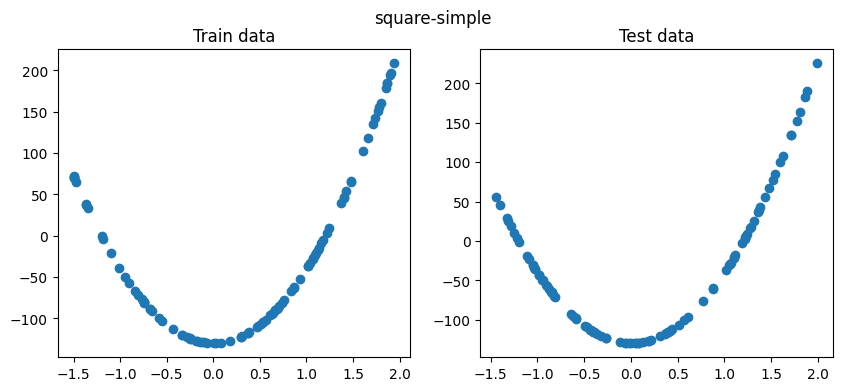

In [14]:
plot_data(title="square-simple",df_test=df_square_test,df_train=df_square)

Widać, że dane pochodzą z funkcji kwadratowej, tak jak mówi ich nazwa. Chcemy wykorzystać naszą sieć w regresji.

##### Sieć z jedną warstwą ukrytą o 5 neuronach

In [15]:
mlp = MLP()

# Two ways of initiating layers in neural network:

#1. initiating a layer with specific number of neurons, and setting the rest afterwards
L0 = Layer(nr_neurons = 5) 
L0.set_weights(np.array([1,1,1,1,1]).reshape(5,1))
L0.set_biases(np.array([2.3, 2, 10, -2, -2.3]))
L0.set_function(sigmoid)
mlp.add(L0,name = "Hidden0")

#2. setting everything when initiating
mlp.add(Layer(
    nr_neurons = 1,
    weights =  np.array([-1000, -280, 1, 5, 1360]).reshape(1,5),
    biases = np.array([900]),
    func=linear
    ),name = "Output")

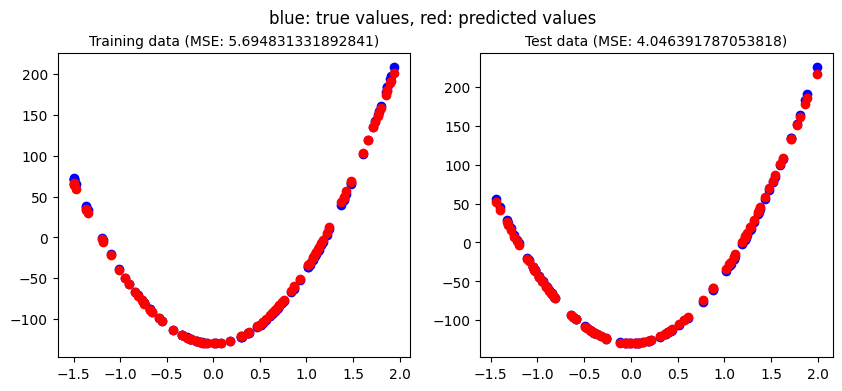

In [16]:
plot_predictions(mlp, df_square, df_square_test)

Na powyższym wykresie są punkty ze zbioru treningowego. Na niebiesko zaznaczone są prawdziwe wartości, a na czerwono te przewidziane przez sieć.


##### Sieć z jedną warstwą ukrytą o 10 neuronach

In [42]:
mlp = MLP()

L0 = Layer(nr_neurons = 10) 
L0.set_weights(np.array([1,1,1,1,1,1,1,1,1,1]).reshape(10,1))
L0.set_biases(np.array([2.3, 2,1,1,10, 10,1,1, -2, -2.3]))
L0.set_function(sigmoid)
mlp.add(L0,name = "Hidden0")

mlp.add(Layer(
    nr_neurons = 1,
    weights =  np.array([-1000, -280, 1,1,1,1,1,1, 5, 1360]).reshape(1,10),
    biases = np.array([896]),
    func=linear
    ),name = "Output")

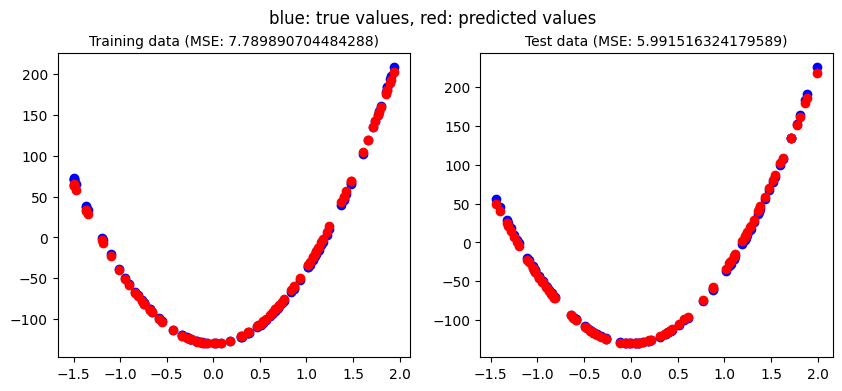

In [43]:
plot_predictions(mlp, df_square, df_square_test)

##### Sieć z dwiema warstwami ukrytymi po 5 neruonów

In [17]:
mlp = MLP()


L0 = Layer(nr_neurons = 5) 
L0.set_weights(np.array([-1.2 ,  0.7, -0.03,  1.2 , -1]).reshape(5,1))
L0.set_biases(np.array([-2.25 , -1.6 ,  0.8, -2.8  ,  2.1]))
L0.set_function(sigmoid)
mlp.add(L0,name = "Hidden0")

L1 = Layer(nr_neurons = 5) 
L1.set_weights(np.array([
    [-2.6 , -0.6, -0.2, -1.3 ,  0.7],
    [-0.8 , -2.3 , -0.2, -0.6, -1.5  ],
    [-0.7 , -0.5, -2.4  , -0.9, -0.8],
    [-1.2  , -0.2 ,  0.4, -3  ,  1.2 ],
    [-1 , -0.6 , -0.4 , -1.3 ,  0.02]
]))
L1.set_biases(np.array([ 0.5,  0.2, -0.1,  0.7,  0.6 ]))
L1.set_function(sigmoid)
mlp.add(L1,name = "Hidden1")

mlp.add(Layer(
    nr_neurons = 1,
    weights =  np.array([-1100,-300,-10,-200,-1000]).reshape(1,5),
    biases = np.array([1300]),
    func=linear
    ),name = "Output")


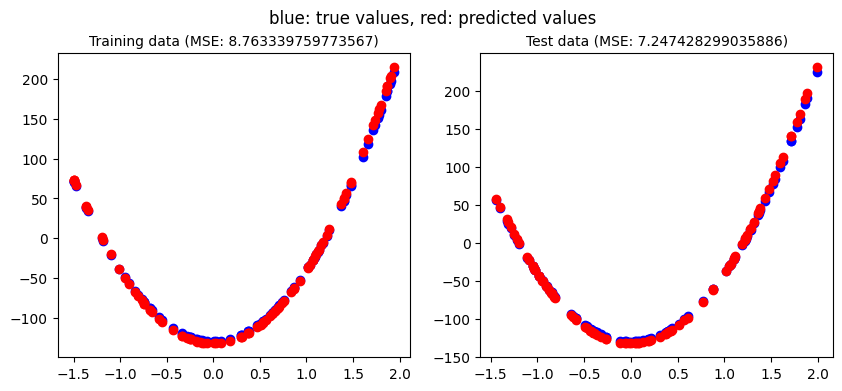

In [18]:
plot_predictions(mlp, df_square, df_square_test)

#### 2. steps-large 

In [19]:
df_steps = pd.read_csv("data/regression/steps-large-training.csv",index_col=0)
df_steps_test = pd.read_csv("data/regression/steps-large-test.csv",index_col=0)
df_steps.head() 

,x,y
1,-1.481354,-80
2,1.033264,80
3,-0.076403,0
4,-1.419785,-80
5,-0.108398,0


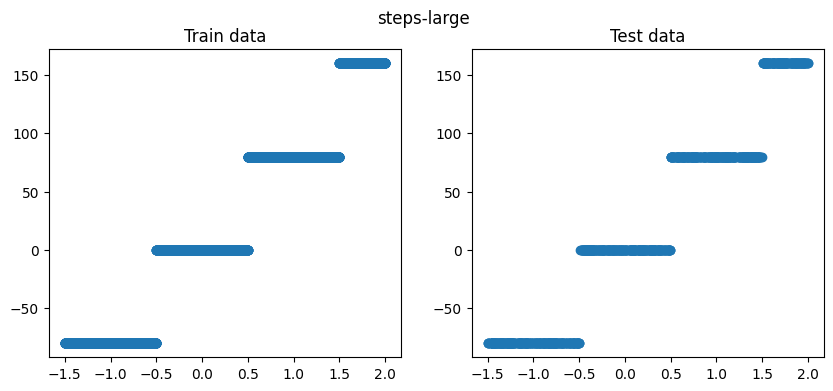

In [20]:
plot_data(title="steps-large",df_train = df_steps, df_test = df_steps_test)

##### Jedna warstwa ukryta o 5 neuronach


In [45]:
mlp = MLP()


L0 = Layer(nr_neurons=5)
L0.set_weights(np.array([ 20000000, 25000000, 40000000 , 0, 0]).reshape(5,1))
L0.set_biases([-30000000, -12500000, 20000000, 0,  0])
L0.set_function(sigmoid)
mlp.add(L0,name="Hidden0")


L1 = Layer(nr_neurons=1)
L1.set_weights(np.array([ 80,80,80,0,0]).reshape(1,5))
L1.set_biases([-80])
L1.set_function(linear)
mlp.add(L1, name="Output")


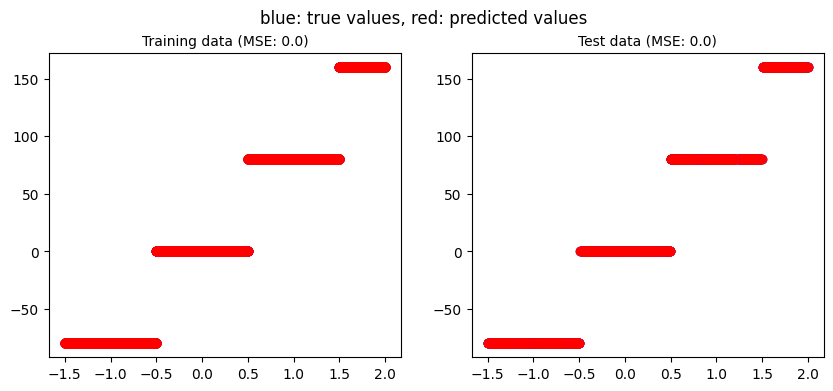

In [46]:
plot_predictions(mlp=mlp,df_train=df_steps,df_test=df_steps_test)

##### Jedna warstwa ukryta o 10 neuronach


In [55]:
mlp = MLP()


L0 = Layer(nr_neurons=10)
L0.set_weights(np.array([ 20000000, 25000000, 40000000 , 0, 0, 0, 0, 0, 0,0]).reshape(10,1))
L0.set_biases([-30000000, -12500000, 20000000, 0,  0,0 , 0, 0, 0, 0])
L0.set_function(sigmoid)
mlp.add(L0,name="Hidden0")


L1 = Layer(nr_neurons=1)
L1.set_weights(np.array([ 80,80,80,0,0,0,0,0,0,0]).reshape(1,10))
L1.set_biases([-80])
L1.set_function(linear)
mlp.add(L1, name="Output")


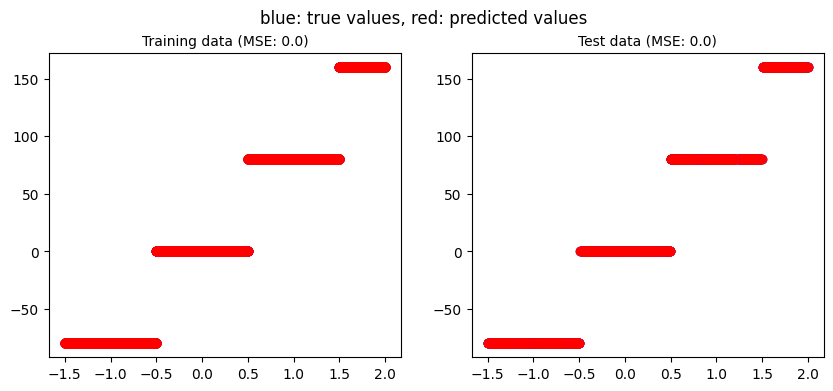

In [56]:
plot_predictions(mlp=mlp,df_train=df_steps,df_test=df_steps_test)

##### Dwie warstwy ukryte po 10 neuronów


In [64]:
mlp = MLP()


L0 = Layer(nr_neurons=5)
L0.set_weights(np.array([ 20000000, 25000000, 40000000, 0, 0]).reshape(5,1))
L0.set_biases([-30000000, -12500000, 20000000, 0, 0])
L0.set_function(sigmoid)
mlp.add(L0,name="Hidden0")


L1 = Layer(nr_neurons=5)
L1.set_weights(np.array([ 
    [20000000, 25000000, 40000000, 0, 0],
    [1, 1, 1, 0, 0],
    [1, 1, 1, 0, 0],
    [1, 1, 1, 0, 0],
    [1, 1, 1, 0, 0]
]))
L1.set_biases([-30000000, -12500000, 20000000, 0, 0])
L1.set_function(sigmoid)
mlp.add(L1,name="Hidden1")




L2 = Layer(nr_neurons=1)
L2.set_weights(np.array([ 80,80,80,0,0]).reshape(1,5))
L2.set_biases([-80])
L2.set_function(linear)
mlp.add(L2, name="Output")


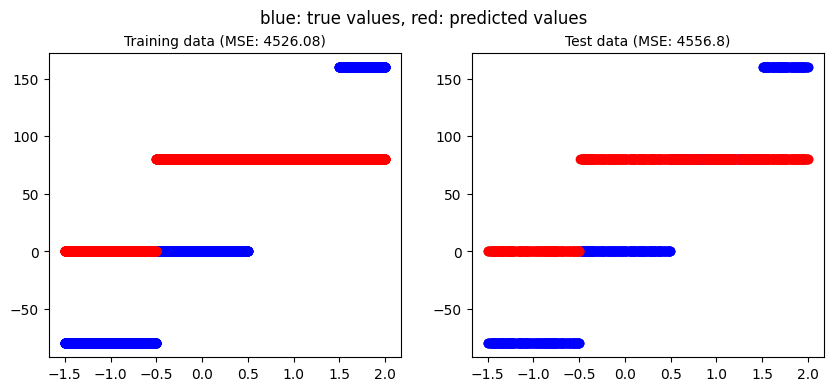

In [65]:
plot_predictions(mlp=mlp,df_train=df_steps,df_test=df_steps_test)